In [1]:
# https://www.youtube.com/watch?v=P4rBiyP1xho

import pandas as pd
import numpy as np

def drop_add_unwanted_columns(df_):
    # drop less useful columns
    df_.drop(['Name','Ticket','Cabin'],axis='columns', inplace=True)

    # combine & drop
    df_['family_mem_count'] = df_.SibSp + df_.Parch
    df_.drop(['SibSp','Parch'],axis='columns', inplace=True)
    
    return df_;
    
def convert_categorial_columns(df_):
    df_['Sex'] = df_['Sex'].astype('category')
    df_['Pclass'] = df_['Pclass'].astype('category')
    df_['Embarked'] = df_['Embarked'].astype('category')
    if 'Survived' in list(df_.columns):
        df_['Survived'] = df_['Survived'].astype('category')
    return df_;

def fill_missing_values(df_):
    df_ = df_.fillna({'Embarked': df_.Embarked.value_counts(dropna=False).index[0], 'Age': np.mean(df_.Age), 'Fare': np.mean(df_.Fare)})
    df_.Embarked.value_counts(dropna=False)
    return df_;

def get_feature_target_columns(df_):
    X = df_[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'family_mem_count']]
    y = df_.Survived
    
    return X,y


df = pd.read_csv('./titanic_data/train.csv')

df = drop_add_unwanted_columns(df)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_mem_count
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [2]:
#df = convert_categorial_columns(df)
df = fill_missing_values(df)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_mem_count
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [3]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

te = ohe.fit_transform(df[['Sex','Embarked', 'Pclass']])
categories = [list(x) for x in ohe.categories_]
ohe_feature_names = sum(categories,[])

df = pd.concat([df, pd.DataFrame(te, columns=ohe_feature_names)], axis='columns')
df.drop(['Sex','Embarked','Pclass'], axis='columns', inplace=True)

columns = list(df.columns)
print(columns)
df.columns = ['PassengerId', 'Survived', 'Age', 'Fare', 'family_mem_count', 
            'female', 'male', 'C', 'Q', 'S', 'P1', 'P2', 'P3']

df.head()

['PassengerId', 'Survived', 'Age', 'Fare', 'family_mem_count', 'female', 'male', 'C', 'Q', 'S', 1, 2, 3]


,PassengerId,Survived,Age,Fare,family_mem_count,female,male,C,Q,S,P1,P2,P3
0,1,0,22.0,7.2500,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,71.2833,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,26.0,7.9250,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,35.0,53.1000,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,35.0,8.0500,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(np.array(df['Age']).reshape(-1, 1))
df['Fare'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1, 1))

df.drop(['PassengerId'],axis='columns', inplace=True)
df.head(2)

,Survived,Age,Fare,family_mem_count,female,male,C,Q,S,P1,P2,P3
0,0,0.271174,0.014151,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0.472229,0.139136,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [5]:
columns_to_int = ['male', 'female', 'C', 'Q', 'S', 'P1', 'P2', 'P3']

def convertFloatToInt(dataframe, columns):
    for col in columns:
        dataframe[col] = dataframe[col].apply(lambda x: int(x))
    return dataframe;

df = convertFloatToInt(df, columns_to_int)
df.head()

,Survived,Age,Fare,family_mem_count,female,male,C,Q,S,P1,P2,P3
0,0,0.271174,0.014151,1,0,1,0,0,1,0,0,1
1,1,0.472229,0.139136,1,1,0,1,0,0,1,0,0
2,1,0.321438,0.015469,0,1,0,0,0,1,0,0,1
3,1,0.434531,0.103644,1,1,0,0,0,1,1,0,0
4,0,0.434531,0.015713,0,0,1,0,0,1,0,0,1


In [6]:
X_train = df.drop(['Survived'], axis='columns')
y_train = df.Survived

X_train.head()

,Age,Fare,family_mem_count,female,male,C,Q,S,P1,P2,P3
0,0.271174,0.014151,1,0,1,0,0,1,0,0,1
1,0.472229,0.139136,1,1,0,1,0,0,1,0,0
2,0.321438,0.015469,0,1,0,0,0,1,0,0,1
3,0.434531,0.103644,1,1,0,0,0,1,1,0,0
4,0.434531,0.015713,0,0,1,0,0,1,0,0,1


In [7]:
X_train.columns.shape

(11,)

In [8]:
X_train.shape

(891, 11)

In [9]:
y_train.shape

(891,)

In [10]:
y_train.unique()

array([0, 1], dtype=int64)

In [11]:
X_train.head()

,Age,Fare,family_mem_count,female,male,C,Q,S,P1,P2,P3
0,0.271174,0.014151,1,0,1,0,0,1,0,0,1
1,0.472229,0.139136,1,1,0,1,0,0,1,0,0
2,0.321438,0.015469,0,1,0,0,0,1,0,0,1
3,0.434531,0.103644,1,1,0,0,0,1,1,0,0
4,0.434531,0.015713,0,0,1,0,0,1,0,0,1


In [12]:
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU

backend.backend()

Using TensorFlow backend.


'tensorflow'

In [13]:
model = Sequential()

model.add(Dense(700, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [14]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
# binary_crossentropy
# categorical_crossentropy     -- most widely used loss function for categorical problems
# sparse_categorical_crossentropy

from keras.utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model.png')

data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [15]:
X_train.values.shape

(891, 11)

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2, dtype='int32')
y_train.shape

(891, 2)

In [17]:
history = model.fit(X_train.values, y_train, batch_size=512, validation_split=0.3, epochs=1000, verbose=0)

In [19]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
#_, test_acc = model.evaluate(X_val, y_val, verbose=0)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f' % (train_acc))

Train: 0.886


In [ ]:
#model = Sequential()
#model.add(Dense(70, input_dim=9, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(50, input_dim=10, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(1, input_dim=10))
#model.add(Activation('sigmoid'))
#--> Train: 0.861, Test: 0.838

#model = Sequential()
#model.add(Dense(70, input_dim=9))
#model.add(Dropout(0.2))
#model.add(LeakyReLU())
#model.add(Dense(50, input_dim=10))
#model.add(Dropout(0.1))
#model.add(LeakyReLU())
#model.add(Dense(1, input_dim=7))
#model.add(Activation('sigmoid'))
#-->Train: 0.834, Test: 0.849

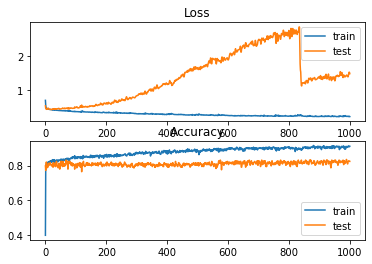

In [21]:
# plot loss during training
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### **PREDICT**

In [22]:
df_test = pd.read_csv('./titanic_data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(len(df_test.columns))
df_test = drop_add_unwanted_columns(df_test)
print(len(df_test.columns))
#df = convert_categorial_columns(df)
df_test = fill_missing_values(df_test)

ohe_test = OneHotEncoder(sparse=False)

te_test = ohe_test.fit_transform(df_test[['Sex','Embarked']])
categories_test = [list(x) for x in ohe_test.categories_]
ohe_feature_names_test = sum(categories_test,[])

df_test = pd.concat([df_test, pd.DataFrame(te_test, columns=ohe_feature_names_test)], axis='columns')
df_test.drop(['Sex','Embarked'], axis='columns', inplace=True)
df_test.head()

In [ ]:
scaler_test = MinMaxScaler()
df_test['Age'] = scaler_test.fit_transform(np.array(df_test['Age']).reshape(-1, 1))
df_test['Fare'] = scaler_test.fit_transform(np.array(df_test['Fare']).reshape(-1, 1))

df_test.drop(['PassengerId'],axis='columns', inplace=True)
df_test.head()

In [ ]:
columns_to_int_test = ['male', 'female', 'C', 'Q', 'S']

df_test = convertFloatToInt(df_test, columns_to_int_test)

In [ ]:
predicted = model.predict(df_test)
values_predicted = np.round(predicted)
column_vals = np.arange(892, 1310)


pred_submission = [int(x[0]) for x in values_predicted]

In [ ]:
output = {'PassengerId':column_vals, 'Survived':pred_submission}
df_submission = pd.DataFrame(output)
df_submission.head()

In [ ]:
df_submission.to_csv('output_nn.csv', index=False)

print('Hey, reached end of the execution.!')

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

In [ ]:
model.evaluate(X_val,y_val,verbose=0)